<a href="https://colab.research.google.com/github/hyphen-ani/Deep-Learning-Pytorch/blob/main/Deep_Learning_Computer_Vision_CNN_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

* [`torchvision`]
* `torchvision.datasets` - get datasets and data loading functions for computer vision.
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model.
* `torchvision.utils` - functions for visualizing and processing data.

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


## 1. Getting a dataset

Dataset:Fashion MNIST

In [2]:
# Setup training data

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

testing_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:03<00:00, 6637451.76it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 234183.69it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4275123.43it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6118525.64it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(training_data), len(testing_data)

(60000, 10000)

In [4]:
image, label = training_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_name = training_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# Check the shape

print(f"Image Shape: {image.shape} -> [color_channels, height, width]")
print(f"Label: {label}")

Image Shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Label: 9


## 1.2 Visualizing Our Data

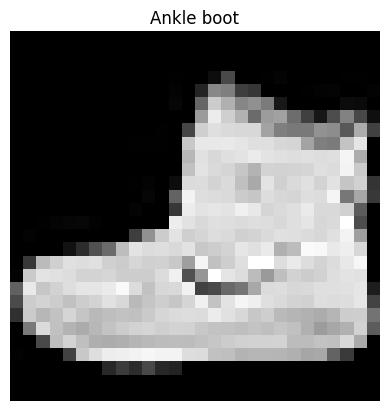

In [7]:
import matplotlib.pyplot as plt

image, label = training_data[0]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_name[label]);
plt.axis(False);


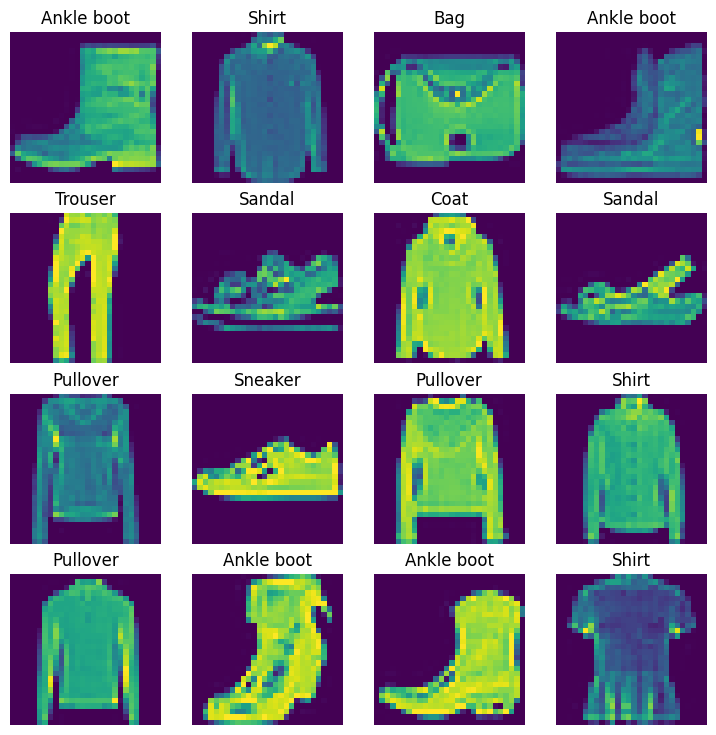

In [8]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
row, cols = 4, 4
for i in range(1, row * cols + 1):
  random_idx = torch.randint(0, len(training_data), size=[1]).item()
  img, label = training_data[random_idx]
  fig.add_subplot(row, cols, i)
  plt.imshow(img.squeeze())
  plt.title(class_name[label])
  plt.axis(False);

In [9]:
training_data, testing_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare Dataloader

Right now, our data is in the form of PyTorch Datasets. We need to transform it into a PyTorch DataLoader.
Dataloader turns our dataset into a Python iterable.

We can turn our data into batches (or mini batches)

Why would we do this?
1. It is more computationally efficient, because the computer hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time.
2. It gives our neural network more chances to update its gradients per epoch/

In [10]:
# Turning training data to dataloader
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=training_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=testing_data,
                             batch_size= BATCH_SIZE,
                             shuffle= False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a70c1f40850>,
 <torch.utils.data.dataloader.DataLoader at 0x7a70c1f42ec0>)

In [11]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [12]:
# Check out what's inside the training Dataloader

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

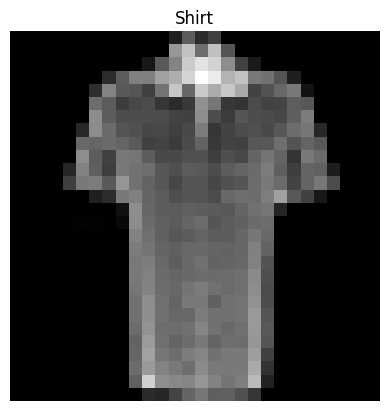

In [13]:
# Show a sample

torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis(False);

## 3. Model 0: Builing a Baseline Model

When starting to builiding a machine learning model, it's a good idea to see how a baseline performs.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: Start simply and add complexity when required.

In [14]:
# Create a flatten layer

flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [15]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [18]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=784,
                          hidden_units=10,
                          output_shape=len(class_name)).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
with torch.inference_mode():
  dummy_x = torch.rand([1, 1, 28, 28])
  out = model_0(dummy_x)

out

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]])

### 3.1 Setup Loss, Optimizer & Evaluation Metrics

* Loss Function - CrossEntropyLoss (As Multi-Class Data)
* Optimizer - SGD
* Evaluation Metrics - Accuracy

In [20]:
import requests
from pathlib import Path

# Download Helper Functions

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get(url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
  print("Download complete")

Download complete


In [21]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a Function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Models Performance (loss and accuracy values etc)
2. Training time: How Fast Does it Runs?

In [22]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device=None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [23]:
start_time = timer()
model_0.state_dict()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


0.00023982800001931537

## 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it

In [24]:
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_model_0 = timer()

# Train
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  ## Training
  train_loss = 0
  for batch, (X_train, y_train) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward Pass
    X_train, y_train = X_train.to(device), y_train.to(device)
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    train_loss += loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    if batch % 200 == 0:
      print(f"Looked at {batch * len(X_train)}/{len(train_dataloader.dataset)} samples")

  # Divide Total Train Loss By Length Of Train Dataloader
  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test_loss & test_accuracy
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_model_0 = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_model_0,
                                            end=train_time_end_model_0,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 6400/60000 samples
Looked at 12800/60000 samples
Looked at 19200/60000 samples
Looked at 25600/60000 samples
Looked at 32000/60000 samples
Looked at 38400/60000 samples
Looked at 44800/60000 samples
Looked at 51200/60000 samples
Looked at 57600/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
---------
Looked at 0/60000 samples
Looked at 6400/60000 samples
Looked at 12800/60000 samples
Looked at 19200/60000 samples
Looked at 25600/60000 samples
Looked at 32000/60000 samples
Looked at 38400/60000 samples
Looked at 44800/60000 samples
Looked at 51200/60000 samples
Looked at 57600/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
---------
Looked at 0/60000 samples
Looked at 6400/60000 samples
Looked at 12800/60000 samples
Looked at 19200/60000 samples
Looked at 25600/60000 samples
Looked at 32000/60000 samples
Looked at 38400/60000 samples
Looked at 44800/60000 samp

## 4. Make Prediction and Get Model 0 Results

In [25]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Returns a dictionary containing the results of a model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [26]:
model_0_results = eval_model(model=model_0,
                         data_loader=test_dataloader,
                         loss_fn=loss_fn,
                         accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup Device Agnostic Code

In [27]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [28]:
# Device Agnostic Code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6: Model 1-Building a better model with non-linearity




In [29]:
# Model:1 - Added Non-Linearity

class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int,
               hidden_unit:int,
               output_shape:int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [30]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_unit=10,
                              output_shape=len(class_name)).to(device)

next(model_1.parameters()).device

device(type='cpu')

In [31]:
# Setup Accuracy & Loss Function, Optimizer

from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionizing Training & Evaluation Code

* training_loop -> `start_training()
* test_loop -> `start_testing()

In [32]:
def start_training(model:torch.nn.Module,
                   data_loader:torch.utils.data.DataLoader,
                   loss_fn: torch.nn.Module,
                   accuracy_fn,
                   optimizer: torch.optim.Optimizer,
                   device: torch.device = device):
  """Perform a training loop step on model going over Dataloader"""

  train_loss, train_acc = 0, 0
  model.to(device)
  model.train()
  for batch, (X_train, y_train) in enumerate(data_loader):

    # Put data on target device
    X_train, y_train = X_train.to(device), y_train.to(device)

    # 1. Forward Pass
    y_pred = model(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y_train, y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Divide Total Train Loss By Length Of Train Dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")

In [33]:
def start_testing(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Perform a testing loop step on model going over Dataloader"""

  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in data_loader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test_loss & test_accuracy
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

In [34]:
torch.manual_seed(42)
from timeit import default_timer as timer

start_time = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  start_training(model=model_1,
                data_loader=train_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                optimizer=optimizer,
                device=device)

  start_testing(model=model_1,
                data_loader=test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn)

end_time = timer()
total_train_time_model_1 = print_train_time(start=start_time,
                                            end=end_time,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 1.09199 | Train Acc: 61.34%
Test loss: 0.95636, Test acc: 65.00%

Epoch: 1
---------
Train Loss: 0.78101 | Train Acc: 71.93%
Test loss: 0.72227, Test acc: 73.91%

Epoch: 2
---------
Train Loss: 0.67027 | Train Acc: 75.94%
Test loss: 0.68500, Test acc: 75.02%

Train time on cpu: 34.435 seconds


> **Note** Sometimes, depending on your data/hardware you might find your model trains faster on CPU then GPU.

> Why is this?

>1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.

>2. The hardware you're using has a better CPU in terms of compute capabilities than the GPU

> How to models compute faster: https://horace.io/brrr_intro.html

In [35]:
model_1_results = eval_model(model=model_1,
                         data_loader=test_dataloader,
                         loss_fn=loss_fn,
                         accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.
CNN's are known for their ability to learn spatial patterns in images.




In [51]:
# Create a convolutional neural network

class FashionMNISTModelv2(nn.Module):
  """
  Model Architecture that replicates the TinyVGG.
  Model from CNN Explainer website: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
      )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # trick to calculate this
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [52]:
torch.manual_seed(42)
model_2 = FashionMNISTModelv2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_name)).to(device)

model_2

FashionMNISTModelv2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 7.1 Stepping Through Conv2D

See the documentation for `nn.Conv2d()`


In [38]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image Shape: {images.shape}")
print(f"Single Image Shape: {test_image.shape}")

Image Shape: torch.Size([32, 3, 64, 64])
Single Image Shape: torch.Size([3, 64, 64])


In [39]:
# Create a Single Conv2D Layet

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

In [40]:
test_image.shape

torch.Size([3, 64, 64])

In [41]:
# Print out original image shape without unsqueezing dimension

print(f"Original Shape: {test_image.shape}")
print(f"With Unsquezzed Dimension: {test_image.unsqueeze(0).shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through Conv Layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after Conv Layer: {test_image_through_conv.shape}")

# Pass data through MaxPool Layer
max_output = max_pool_layer(test_image_through_conv)
print(f"Shape after MaxPool Layer: {max_output.shape}")

Original Shape: torch.Size([3, 64, 64])
With Unsquezzed Dimension: torch.Size([1, 3, 64, 64])
Shape after Conv Layer: torch.Size([1, 10, 64, 64])
Shape after MaxPool Layer: torch.Size([1, 10, 32, 32])


In [42]:
torch.manual_seed(42)
# Create a random tensor with similar number of dimensions to our images

random_tensor = torch.randn(size=(1, 1, 2, 2))
max_pool_layer = nn.MaxPool2d(kernel_size=2)
print(f"Random Tensor: {random_tensor}")
print(f"Shape of Random Tensor: {random_tensor.shape}")

# Pass the random tensor through the maxpool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max Pool Tensor: {max_pool_tensor}")
print(f"Shape of Max Pool Tensor: {max_pool_tensor.shape}")

Random Tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Shape of Random Tensor: torch.Size([1, 1, 2, 2])
Max Pool Tensor: tensor([[[[0.3367]]]])
Shape of Max Pool Tensor: torch.Size([1, 1, 1, 1])


In [43]:
rand_image_tensor = torch.rand(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [44]:
model_2(rand_image_tensor.unsqueeze(dim=0).to(device))

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10])


tensor([[ 0.0280, -0.0701,  0.0623, -0.0392, -0.0155,  0.0186,  0.0038, -0.0171,
          0.0174, -0.0007]], grad_fn=<AddmmBackward0>)

In [53]:
### 7.3 Setup a loss function and optimizer for CNN
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [54]:
### 7.4 Training & Testing Our CNN Model


torch.manual_seed(42)
from timeit import default_timer as timer

start_time = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  start_training(model=model_2,
                data_loader=train_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                optimizer=optimizer,
                device=device)

  start_testing(model=model_2,
                data_loader=test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                device=device)

end_time = timer()
total_train_time_model_2 = print_train_time(start=start_time,
                                            end=end_time,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.59518 | Train Acc: 78.38%
Test loss: 0.39500, Test acc: 85.99%

Epoch: 1
---------
Train Loss: 0.36536 | Train Acc: 86.90%
Test loss: 0.35244, Test acc: 86.91%

Epoch: 2
---------
Train Loss: 0.32588 | Train Acc: 88.13%
Test loss: 0.32719, Test acc: 88.07%

Train time on cpu: 159.624 seconds


In [55]:
model_2_results = eval_model(model=model_2,
                         data_loader=test_dataloader,
                         loss_fn=loss_fn,
                         accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [56]:
model_2_results

{'model_name': 'FashionMNISTModelv2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [58]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelv2,0.327190,88.069089


In [59]:
### Add Training time to results comparison

compare_results["training_time"] = [total_train_time_model_0,
                                     total_train_time_model_1,
                                     total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,34.956242
1,FashionMNISTModelV1,0.685001,75.019968,34.434781
2,FashionMNISTModelv2,0.327190,88.069089,159.624282


Text(0, 0.5, 'Model')

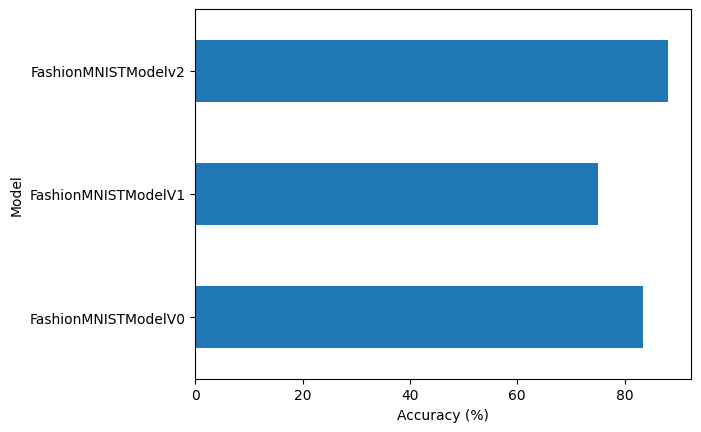

In [62]:
## Visualize Our Model Results

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")

### 9. Make and evaluate random prediction with best model

In [63]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

torch.Size([1, 28, 28])

In [83]:
# Make Predictions

import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(testing_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 2, 0, 1, 2, 2, 1, 4, 4])

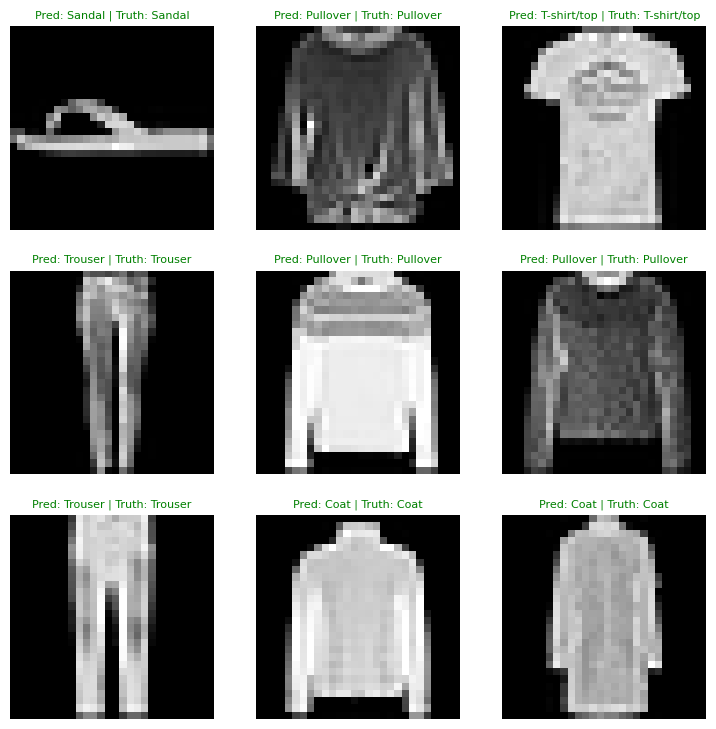

In [84]:
# Plot Predictions

plt.figure(figsize=(9,9))
nrows = 3
ncol = 3

for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncol, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_name[pred_classes[i]]
  truth_label = class_name[test_labels[i]]

  if pred_label == truth_label:
    plt.title(f"Pred: {pred_label} | Truth: {truth_label}",
              color="g", fontsize=8)
  else:
    plt.title(f"Pred: {pred_label} | Truth: {truth_label}",
              color="r", fontsize=8)
  plt.axis(False)

## Making a Confusion Matrix For Further Prediction Evaluation

1. Make Predictions with our trained model
2. Setup Confusion Matrix Using `torchmetrics.ConfusionMatrix`
3. Plot Confusion Matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [85]:
from tqdm.auto import tqdm

# 1. Make prediction with trained model

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [87]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 12.9 MB/s eta 0:00:00


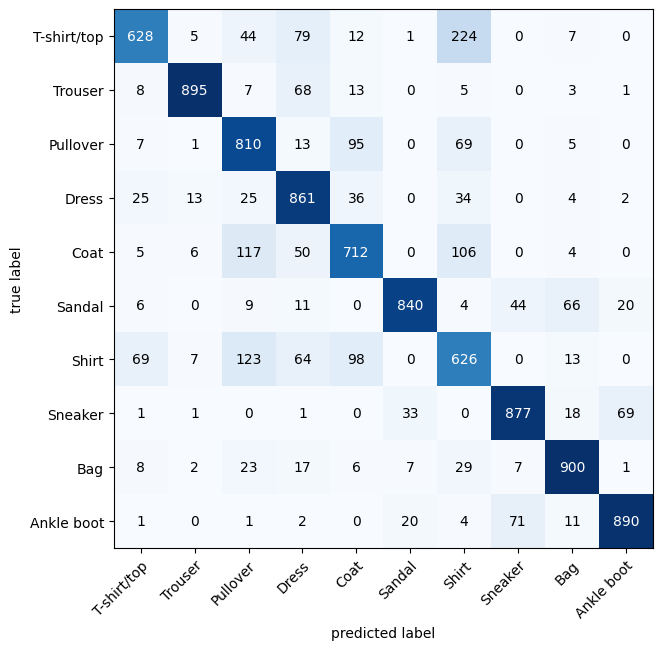

In [90]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup Confusion Instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_name), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=testing_data.targets)

# 3.Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_name,
    figsize=(10,7))

## 11. Save Our Model Best Performing Model

In [92]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "02_TinyVGG_CV_Model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving Model: {MODEL_NAME}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)
print("Done")

Saving Model: 02_TinyVGG_CV_Model_2.pth
Done


In [97]:
# Create a new Instance

torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelv2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_name)).to(device)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelv2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [98]:
# Evalute loaded model

loaded_model_2_results = eval_model(model=loaded_model_2,
                         data_loader=test_dataloader,
                         loss_fn=loss_fn,
                         accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [99]:
print(loaded_model_2_results)
print(model_2_results)

{'model_name': 'FashionMNISTModelv2', 'model_loss': 0.32718968391418457, 'model_acc': 88.06908945686901}
{'model_name': 'FashionMNISTModelv2', 'model_loss': 0.32718968391418457, 'model_acc': 88.06908945686901}


In [100]:
# Check if model results are close to each other

torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)